importing labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

Loading Dataset

In [2]:
df = pd.read_csv("/content/household_power_consumption project.csv", low_memory=False)
print("Dataset Loaded")

Dataset Loaded


Converting Date and Time Columns

In [3]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date','Time'])
df = df.set_index('Datetime')

/tmp/ipython-input-3086178148.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


Converting numeric columns

In [4]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(method='ffill')

/tmp/ipython-input-464854712.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Feature Engineering and Creating Lag and Rolling Features

In [5]:
df['lag_1'] = df['Global_active_power'].shift(1)
df['rolling_mean_24'] = df['Global_active_power'].rolling(window=24).mean()
df = df.dropna()

Training and Testing Split

In [6]:
X = df[['lag_1','rolling_mean_24']]
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Machine Learning  Model

In [7]:
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Model Evaluation

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mape = mean_absolute_percentage_error(y_test, preds)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 0.4017108377550942
MAPE: 0.15442461108489577


Ploting Results

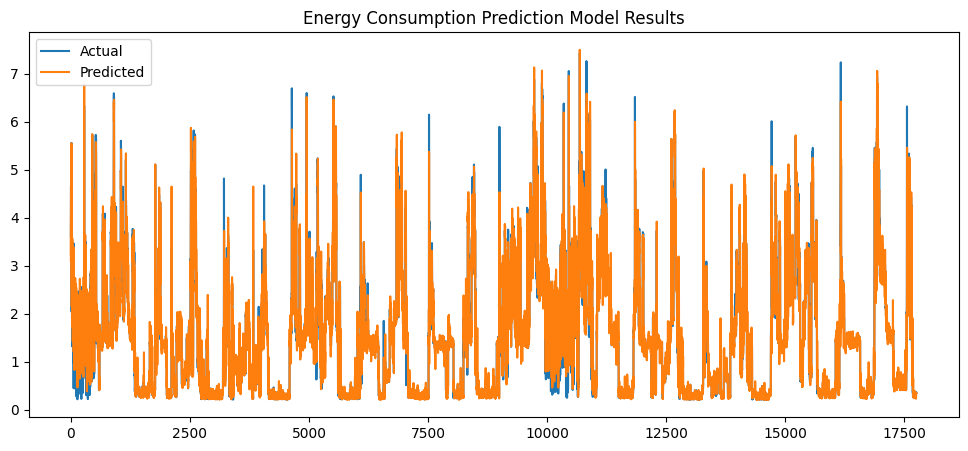

In [9]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title('Energy Consumption Prediction Model Results')
plt.show()